In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nilearn import plotting
from os.path import join
from glob import glob

In [2]:
fig_dir = '/Users/katherine/Dropbox/Projects/physics-retrieval/figures'
data_dir = '/Users/katherine/Dropbox/Projects/physics-retrieval/data/output/'

In [3]:
shen_nii = '/Users/katherine/Dropbox/Projects/physics-retrieval/shen2015_2mm_268_parcellation.nii.gz'
coordinates = plotting.find_parcellation_cut_coords(labels_img=shen_nii)

In [4]:
edges = glob(join(data_dir, '*sig-edges.csv'))

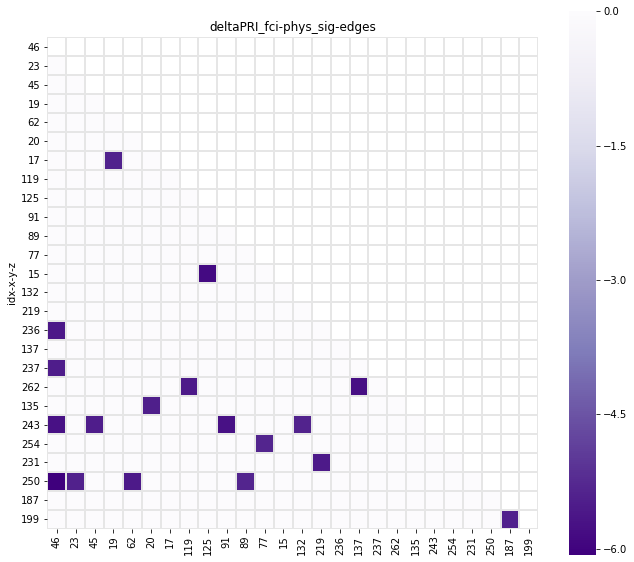

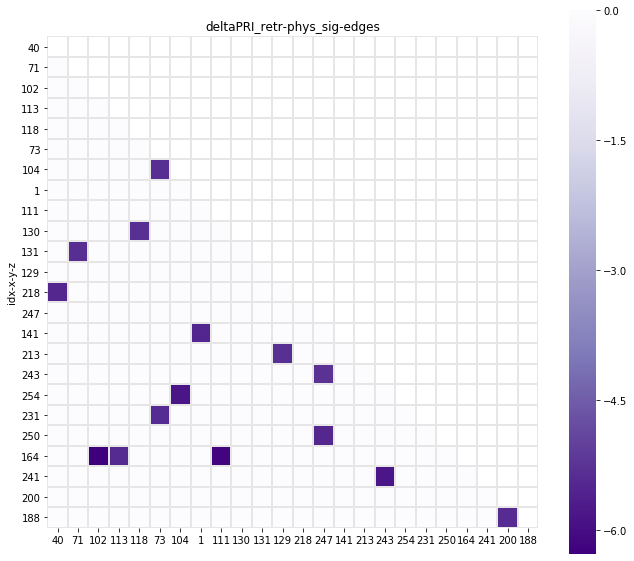

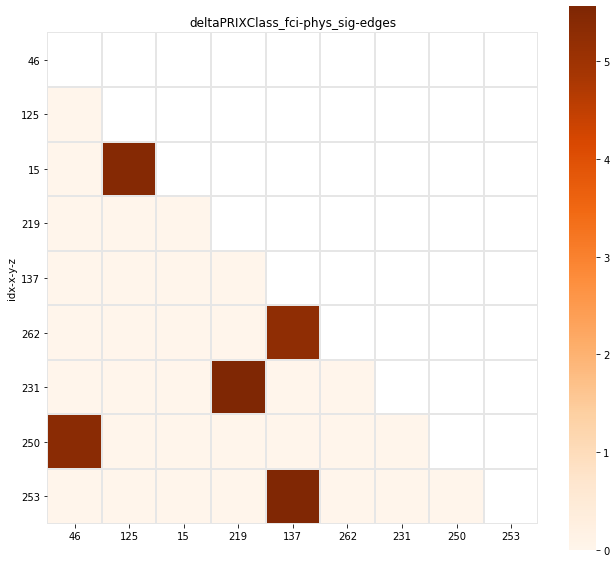

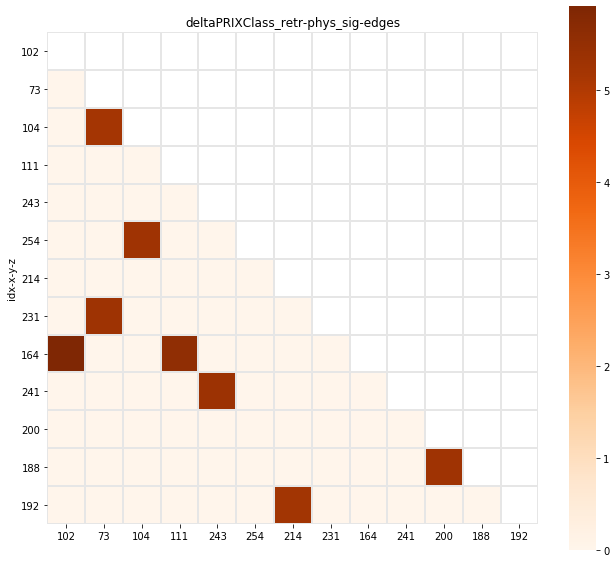

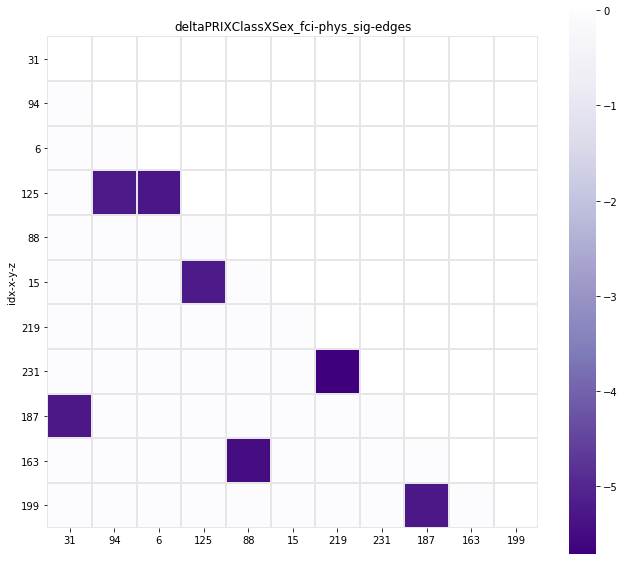

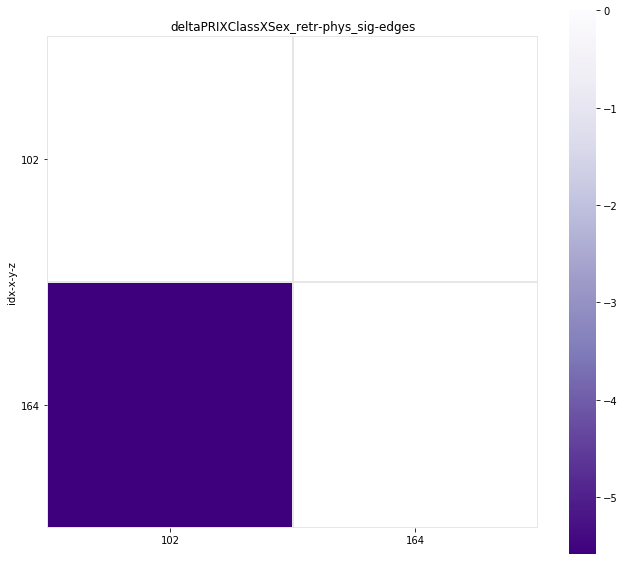

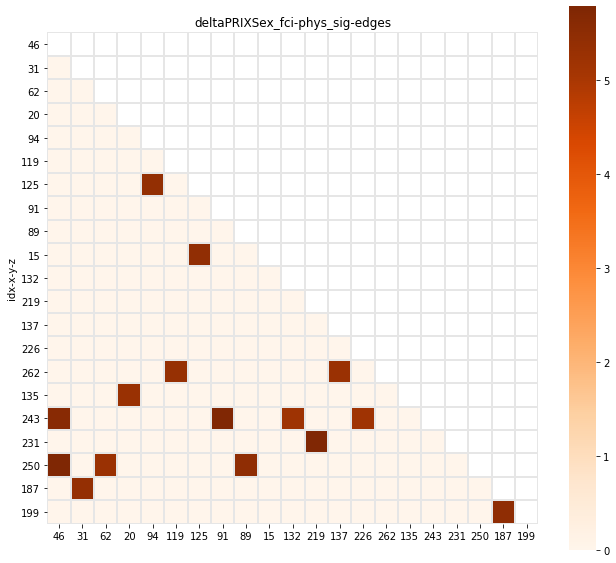

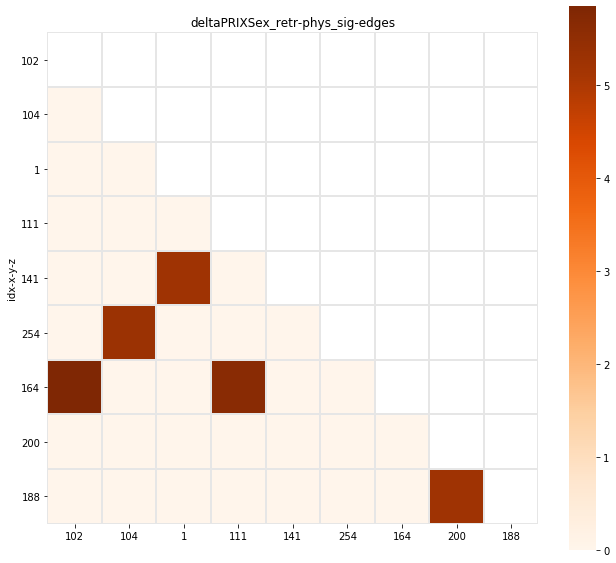

In [9]:
for edge in edges:    
    conns = pd.read_csv(edge, index_col=0, header=0)
    conns.dropna(how='all', axis=0, inplace=True)
    conns.dropna(how='all', axis=1, inplace=True)
    conns.fillna(0, inplace=True)
    for i in conns.index:
        conns.at[i,'x'] = coordinates[i-1][0]
        conns.at[i,'y'] = coordinates[i-1][1]
        conns.at[i,'z'] = coordinates[i-1][2]
    conns.set_index([conns.index, 'x', 'y', 'z'], inplace=True)
    conns.sort_index(level='x', ascending=False, inplace=True)
    conns.index.rename(['idx', 'x', 'y', 'z'], inplace=True)
    nodes = list(conns.index.get_level_values('idx').astype(str))
    mask = np.triu(np.ones_like(conns.values, dtype=np.bool))
    regression = edge[64:-4]
    fig,ax = plt.subplots(figsize=(11,10))
    if conns.max().max() > 0:
        cmap = 'Oranges'
    else:
        cmap = 'Purples_r'
    g = sns.heatmap(conns[nodes], mask=mask, square=True, cmap=cmap, linecolor='0.9', linewidths=1)
    g.set_yticklabels(labels=nodes, rotation=0)
    g.set_title(regression)
    fig.savefig(join(fig_dir, '{0}-heatmap.png'.format(regression)), dpi=300)